
Correlation matrix:
          buying  maint  doors  persons  lug_boot  safety  class
buying     1.000 -0.000  0.000    0.000    -0.000  -0.000 -0.283
maint     -0.000  1.000  0.000    0.000     0.000  -0.000 -0.232
doors      0.000  0.000  1.000   -0.000    -0.000   0.000  0.066
persons    0.000  0.000 -0.000    1.000    -0.000   0.000  0.373
lug_boot  -0.000  0.000 -0.000   -0.000     1.000   0.000  0.158
safety    -0.000 -0.000  0.000    0.000     0.000   1.000  0.439
class     -0.283 -0.232  0.066    0.373     0.158   0.439  1.000


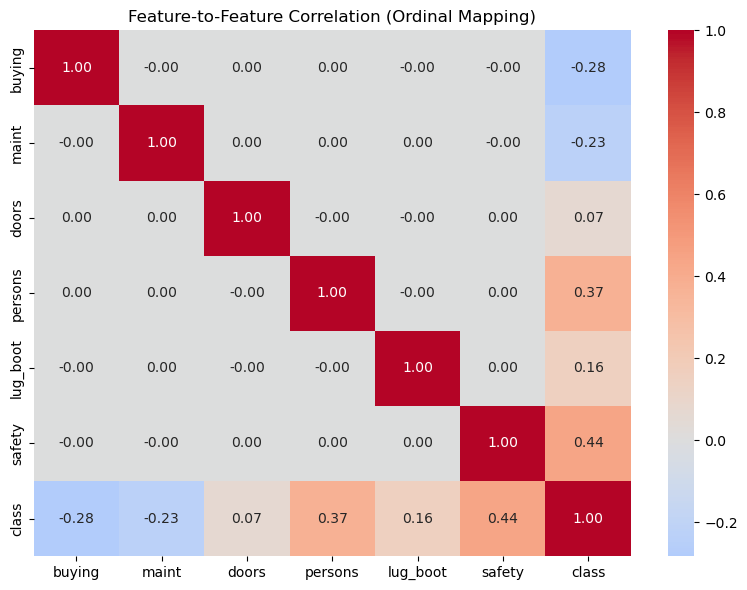

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

PC = 'PC'

# Load dataset
if PC == 'PC':
    CSV_PATH = r"C:\Users\Usuario\Downloads\car.data"
elif PC == 'Laptop':
    CSV_PATH = r"C:\Users\emi_g\ML2025\mlct\data\external\car.data"
df = pd.read_csv(
    CSV_PATH,
    header=None,
    names=["buying","maint","doors","persons","lug_boot","safety","class"]
)

# Ordinal mapping for all categorical variables (based on natural order)
ord_map_general = {"low": 0, "med": 1, "high": 2, "vhigh": 3}
ord_map_doors   = {"2": 2, "3": 3, "4": 4, "5more": 5}
ord_map_persons = {"2": 2, "4": 4, "more": 5}
ord_map_lugboot = {"small": 0, "med": 1, "big": 2}
ord_map_class   = {"unacc": 0, "acc": 1, "good": 2, "vgood": 3}

# Apply mappings
df["buying"]   = df["buying"].map(ord_map_general)
df["maint"]    = df["maint"].map(ord_map_general)
df["doors"]    = df["doors"].map(ord_map_doors)
df["persons"]  = df["persons"].map(ord_map_persons)
df["lug_boot"] = df["lug_boot"].map(ord_map_lugboot)
df["safety"]   = df["safety"].map(ord_map_general)
df["class"]    = df["class"].map(ord_map_class)

# Compute correlation matrix
corr_matrix = df.corr()

# Display correlation matrix numerically
print("\nCorrelation matrix:")
print(corr_matrix.round(3))

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Feature-to-Feature Correlation (Ordinal Mapping)")
plt.tight_layout()
plt.show()



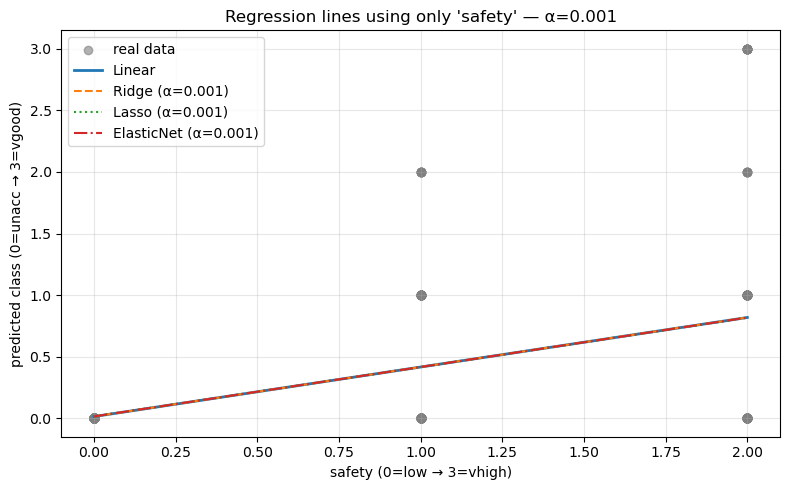

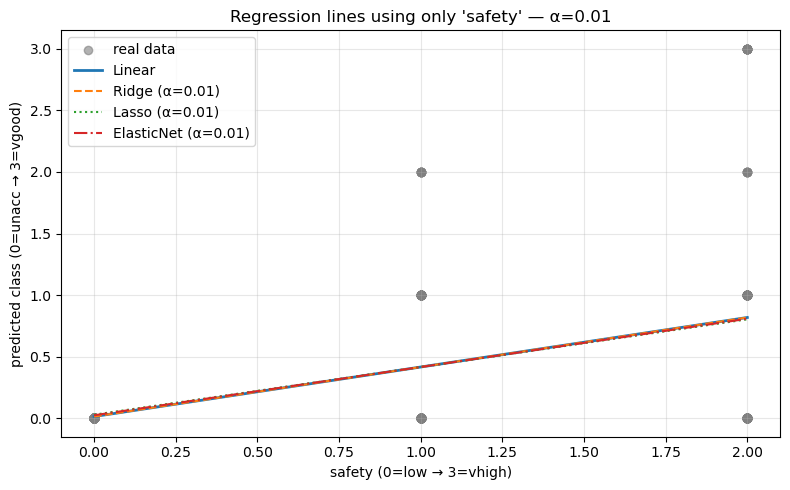

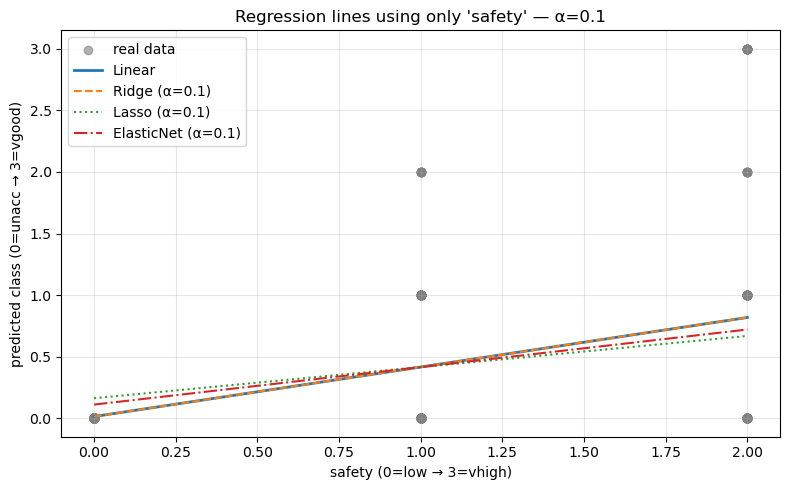

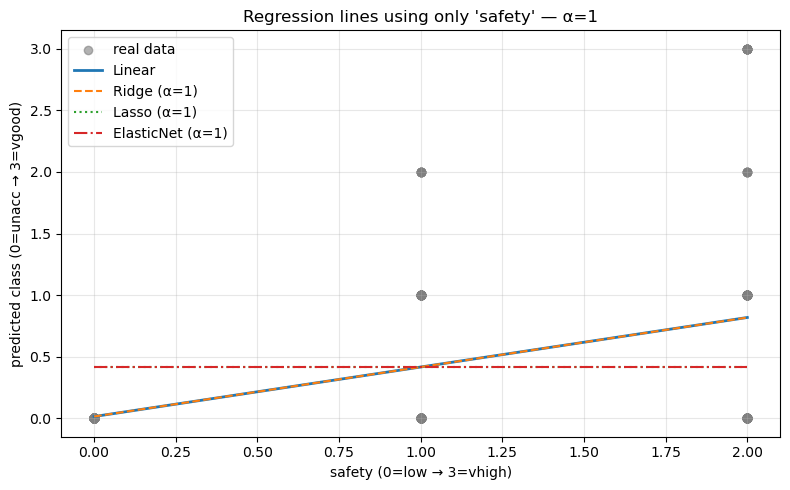

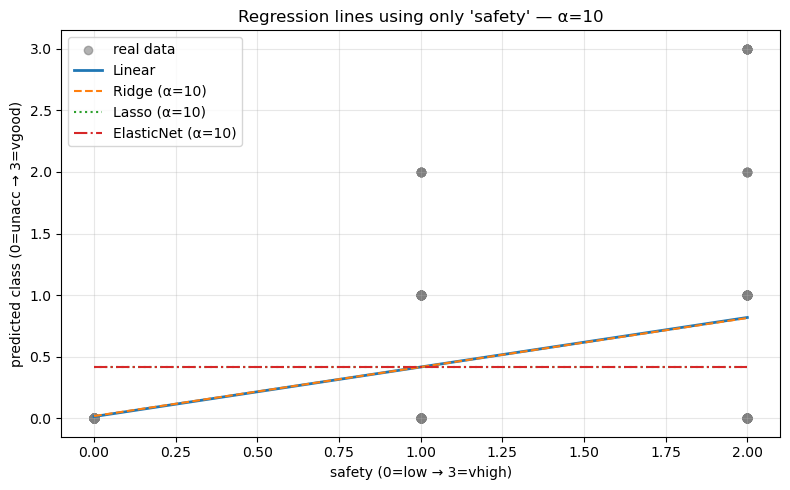

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# Load dataset
if PC == 'PC':
    CSV_PATH = r"C:\Users\Usuario\Downloads\car.data"
elif PC == 'Laptop':
    CSV_PATH = r"C:\Users\emi_g\ML2025\mlct\data\external\car.data"
df = pd.read_csv(CSV_PATH, header=None,names=["buying","maint","doors","persons","lug_boot","safety","class"])

# ordinal maps
ord_map_level = {"low": 0, "med": 1, "high": 2, "vhigh": 3}
class_map     = {"unacc": 0, "acc": 1, "good": 2, "vgood": 3}

df["safety_num"] = df["safety"].map(ord_map_level)
df["class_num"]  = df["class"].map(class_map)

X = df[["safety_num"]].values
y = df["class_num"].values

# Split data
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train linear model
lin = LinearRegression().fit(X_tr, y_tr)

# Regularization strengths
alphas = [0.001, 0.01, 0.1, 1, 10]

# Create line for regression visualization
x_min, x_max = X.min(), X.max()
X_line = np.linspace(x_min, x_max, 100).reshape(-1, 1)

# Scatter data
x_scatter = X_te
y_scatter = y_te

# Loop over alphas
for a in alphas:
    ridge = Ridge(alpha=a, random_state=42).fit(X_tr, y_tr)
    lasso = Lasso(alpha=a, max_iter=200000, random_state=42).fit(X_tr, y_tr)
    enet  = ElasticNet(alpha=a, l1_ratio=0.5, max_iter=200000, random_state=42).fit(X_tr, y_tr)

    # Predictions for line
    y_lin   = lin.predict(X_line)
    y_ridge = ridge.predict(X_line)
    y_lasso = lasso.predict(X_line)
    y_enet  = enet.predict(X_line)

    # Plot scatter + regression lines
    plt.figure(figsize=(8,5))
    plt.scatter(x_scatter, y_scatter, color="gray", alpha=0.6, label="real data")
    plt.plot(X_line, y_lin,   label="Linear", linewidth=2)
    plt.plot(X_line, y_ridge, '--', label=f"Ridge (α={a})")
    plt.plot(X_line, y_lasso, ':',  label=f"Lasso (α={a})")
    plt.plot(X_line, y_enet,  '-.', label=f"ElasticNet (α={a})")
    plt.xlabel("safety (0=low → 3=vhigh)")
    plt.ylabel("predicted class (0=unacc → 3=vgood)")
    plt.title(f"Regression lines using only 'safety' — α={a}")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
